In [1]:
pip install pandas xlrd openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
input_file= "Rotten_Tomatoes_Movies3.xls" 
output_file = "Rotten_Tomatoes_Movies3.csv"
df = pd.read_excel(input_file)
df.to_csv(output_file, index=False)

In [3]:
df_movie = pd.read_csv('Rotten_Tomatoes_Movies3.csv')
df_movie.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [4]:
df_movie.describe()


,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'PG-13)' 'NC17' 'R)']


[Text(0, 0, '6136'),
 Text(0, 0, '4862'),
 Text(0, 0, '2885'),
 Text(0, 0, '2062'),
 Text(0, 0, '652'),
 Text(0, 0, '37'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

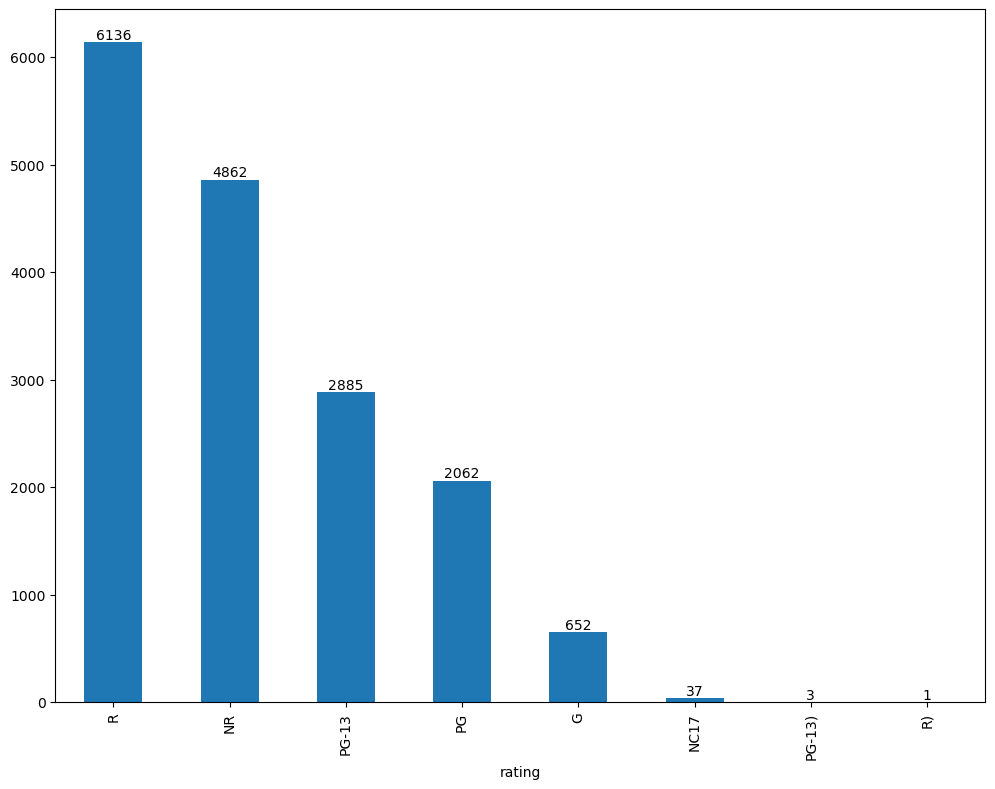

In [5]:
print(f'Content Rating category: {df_movie.rating.unique()}')
ax = df_movie.rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [6]:
content_rating = pd.get_dummies(df_movie.rating)
content_rating.head()

,G,NC17,NR,PG,PG-13,PG-13),R,R)
0,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False,False


In [7]:
tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified Fresh'],[0,1,2]))
tomatometer_status


C:\Users\khush\AppData\Local\Temp\ipykernel_10816\2892236176.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified Fresh'],[0,1,2]))


,tomatometer_status
0,0
1,2
2,1
3,2
4,1
...,...
16633,0
16634,2
16635,1
16636,1


In [8]:
df_movie.head(1)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0


In [9]:
df_feature = pd.concat([df_movie[['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating']], content_rating, tomatometer_status], axis=1).dropna()
df_feature.head()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,G,NC17,NR,PG,PG-13,PG-13),R,R),tomatometer_status
0,83.0,49,144,53.0,False,False,False,True,False,False,False,False,0
1,90.0,86,140,64.0,False,False,False,False,False,False,True,False,2
2,118.0,68,22,53.0,False,False,False,False,False,False,True,False,1
3,95.0,100,51,97.0,False,False,True,False,False,False,False,False,2
4,127.0,89,27,74.0,True,False,False,False,False,False,False,False,1


In [10]:
df_feature.describe()


,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,tomatometer_status
count,16239.000000,16239.000000,16239.000000,16239.000000,16239.000000
mean,102.563520,60.455324,57.025433,60.521153,0.745674
std,25.039112,28.569682,66.306572,20.443700,0.742563
min,1.000000,0.000000,5.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,0.000000
50%,99.000000,66.000000,29.000000,63.000000,1.000000
75%,111.000000,86.000000,77.000000,78.000000,1.000000
max,2000.000000,100.000000,497.000000,100.000000,2.000000


In [11]:
len(df)

16638

[Text(0, 0, '7067'), Text(0, 0, '6235'), Text(0, 0, '2937')]

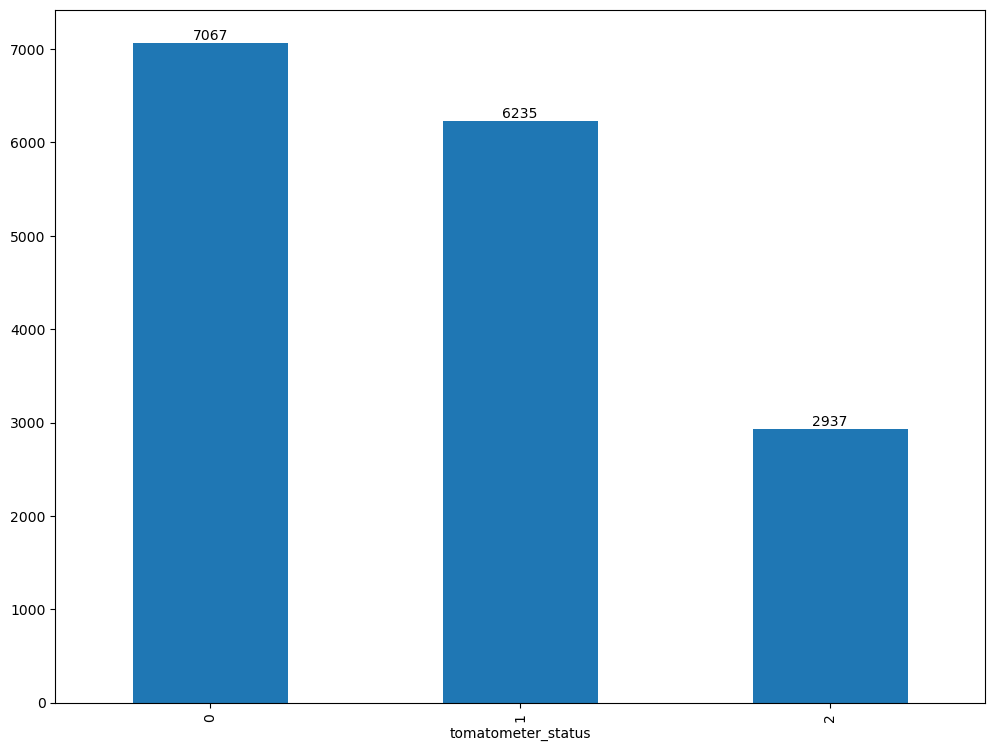

In [12]:
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1), df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 12991 and the size of test data is 3248


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes= 3, random_state=2)

In [15]:
tree_3_leaf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [16]:
y_predict = tree_3_leaf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9396551724137931
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1409
           1       1.00      0.84      0.91      1225
           2       0.76      1.00      0.86       614

    accuracy                           0.94      3248
   macro avg       0.92      0.95      0.93      3248
weighted avg       0.95      0.94      0.94      3248



In [18]:
pip install matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


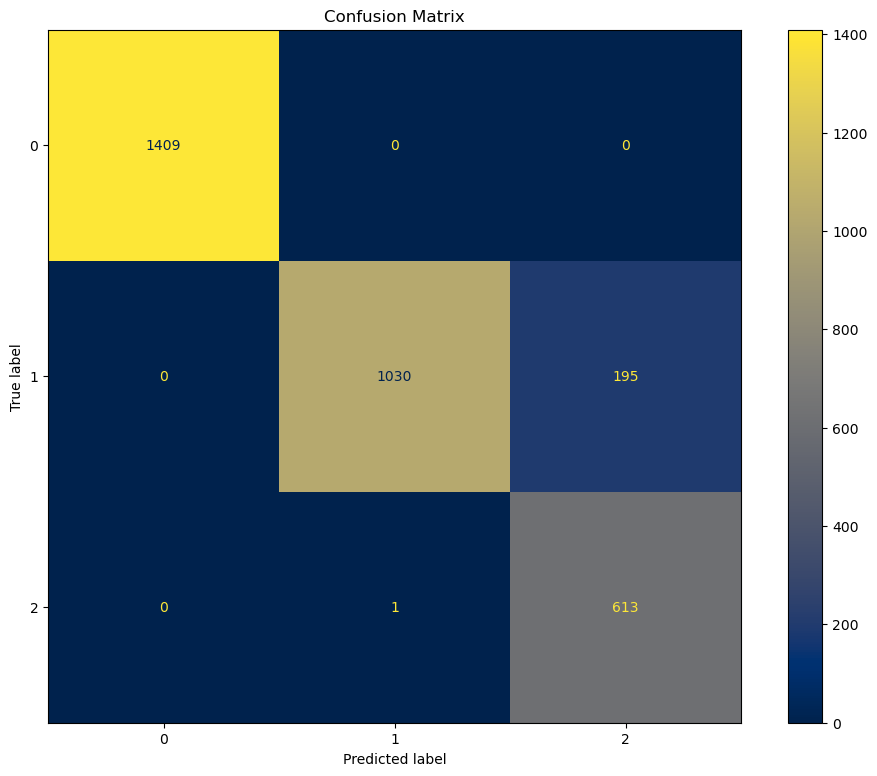

In [20]:
fig, ax = plt.subplots(figsize=(12, 9))
ConfusionMatrixDisplay.from_estimator(tree_3_leaf,X_test,y_test,cmap='cividis',ax=ax)

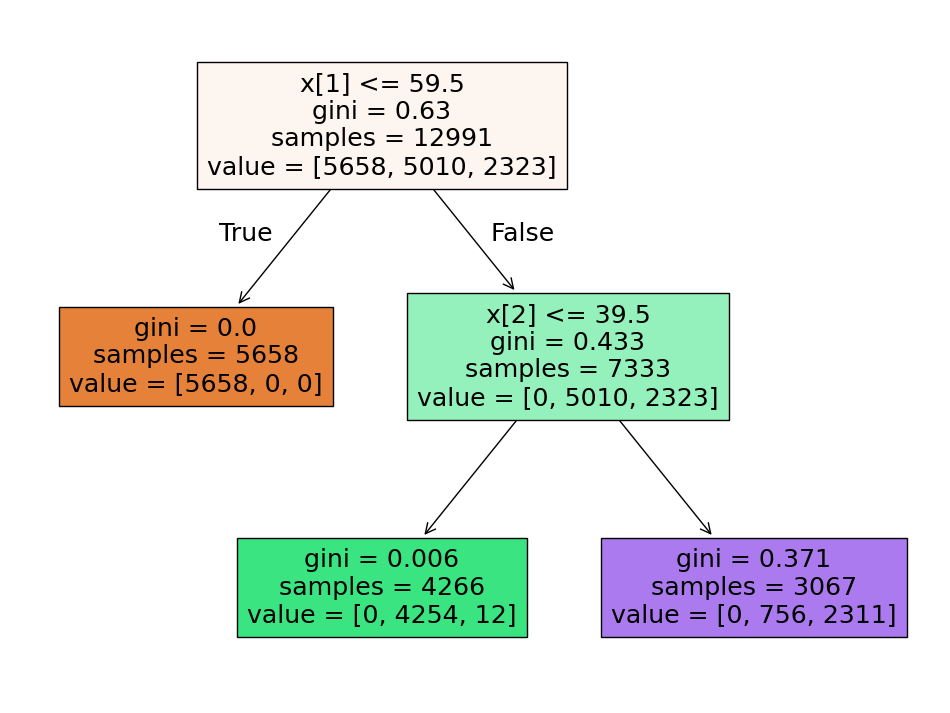

In [21]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 9))
plot_tree(tree_3_leaf, ax=ax, filled=True)  # 'filled=True' adds colors to the nodes
plt.show()


In [22]:
tree = DecisionTreeClassifier(random_state=2)

In [23]:
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=2)

In [24]:
y_predict = tree.predict(X_test)

In [25]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9867610837438424
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1409
           1       0.99      0.98      0.98      1225
           2       0.96      0.97      0.97       614

    accuracy                           0.99      3248
   macro avg       0.98      0.98      0.98      3248
weighted avg       0.99      0.99      0.99      3248



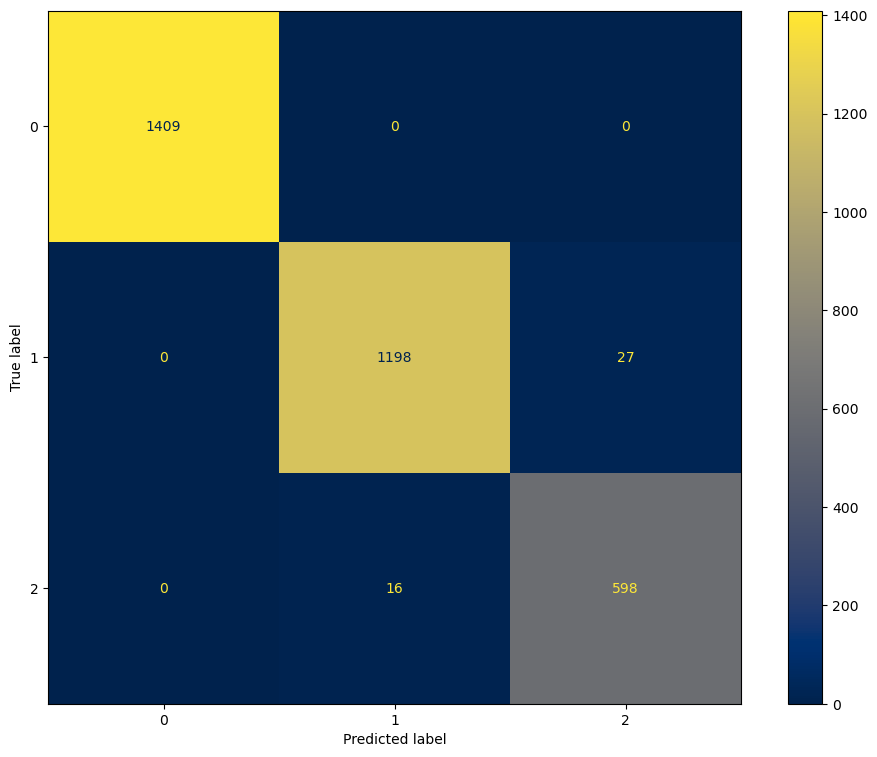

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
ConfusionMatrixDisplay.from_estimator(tree,X_test,y_test,cmap='cividis',ax=ax)

In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
  Rolling back uninstall of pip
  Moving to c:\users\khush\appdata\roaming\python\python312\scripts\pip.exe
   from C:\Users\khush\AppData\Local\Temp\pip-uninstall-et2v44ff\pip.exe
  Moving to c:\users\khush\appdata\roaming\python\python312\scripts\pip3.12.exe
   from C:\Users\khush\AppData\Local\Temp\pip-uninstall-et2v44ff\pip3.12.exe
  Moving to c:\users\khush\appdata\roaming\python\python312\scripts\pip3.exe
   from C:\Users\khush\AppData\Local\Temp\pip-uninstall-et2v44ff\pip3.exe
  Moving to c:\users\khush\appdata\roaming\python\python312\site-packages\pip-23.3.1.dist-info\
   from C:\Users\khush\AppData\Roaming\Python\Python312\site-packages\~ip-23.3.1.dist-info
  Moving to c:\users\khush\appdata\roaming\python\python312\site-packa

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\khush\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\khush\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khush\AppData\Roaming\Python\Python312\site-packages\pip\_internal\commands\install.py", line 452, in run
    installed = install_given_reqs(
                ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khush\AppData\Roaming\Python\Python312\site-packages\pip\_internal\req\__init__.py", line 72, in install_given_reqs
    requirement.install(
  File "C:\Users\khush\AppData\Roaming\Python\Python312\site-packages\pip\_internal\req\req_install.py", line 847, in install
    install_wheel(
  File "C:\Users\khush\AppData\Roaming\Python\Python

In [30]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.6.0
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [33]:
y_predict = rf.predict(X_test)

In [34]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9923029556650246
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1409
           1       0.99      0.99      0.99      1225
           2       0.98      0.98      0.98       614

    accuracy                           0.99      3248
   macro avg       0.99      0.99      0.99      3248
weighted avg       0.99      0.99      0.99      3248



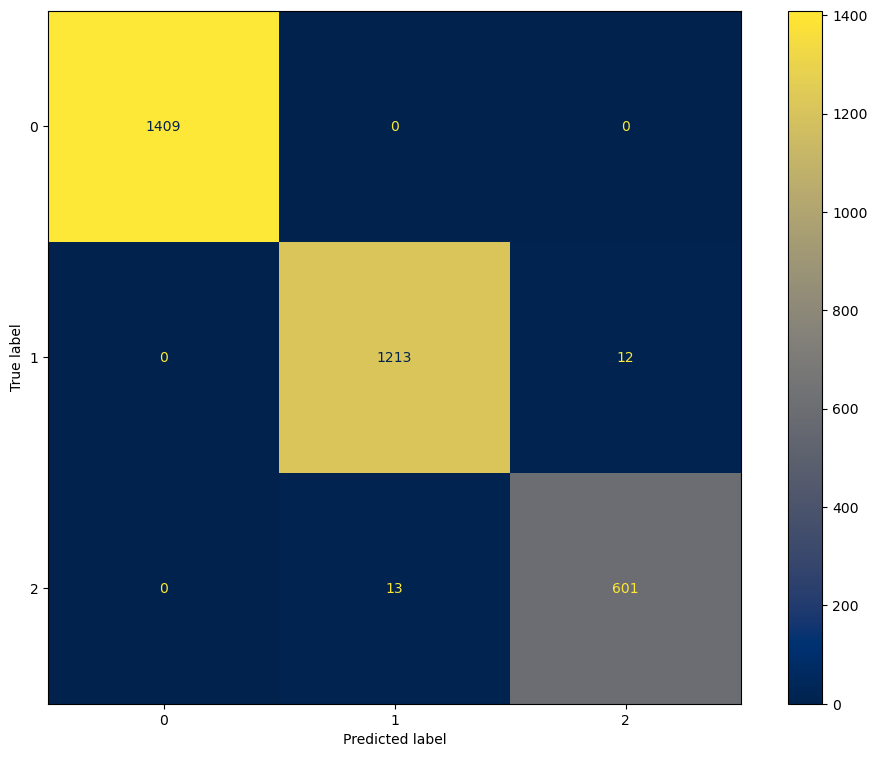

In [35]:

fig, ax = plt.subplots(figsize=(12, 9))
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test,cmap='cividis',ax=ax)




In [36]:
feature_importance = rf.feature_importances_

In [37]:
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

runtime_in_minutes = 0.017985825063111843
tomatometer_rating = 0.61556783370705
tomatometer_count = 0.2118906872183589
audience_rating = 0.11319182038924389
G = 0.0012512437343306052
NC17 = 0.00010946730646564492
NR = 0.025703588064900487
PG = 0.0013035894789297402
PG-13 = 0.006944601585945947
PG-13) = 1.6381178981399096e-05
R = 0.006006052158347913
R) = 2.8910114333688024e-05


In [38]:
import numpy as np
indices = np.argsort(feature_importance)

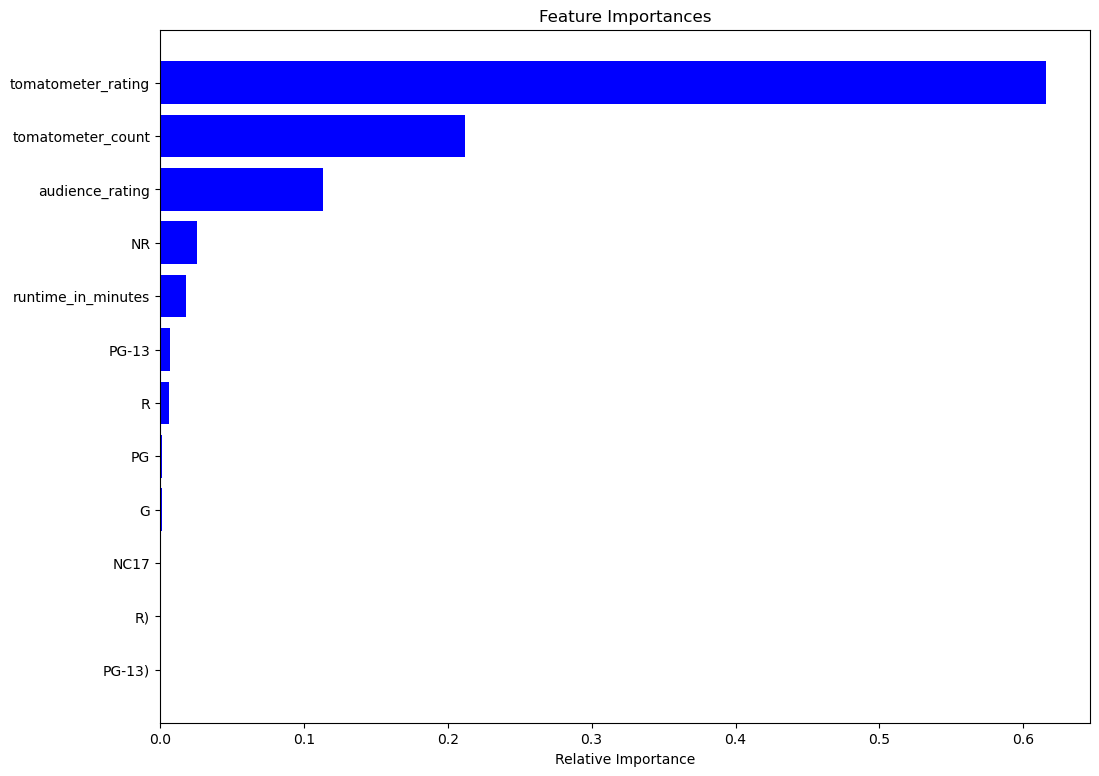

In [39]:
plt.figure(figsize=(12,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
feature_importance = rf.feature_importances_
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status', 'NR', 'runtime_in_minutes', 'PG-13', 'R', 'PG','G', 'NC17'], axis=1),df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 12991 and the size of test data is 3248


In [41]:
rf = RandomForestClassifier(random_state=2)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [42]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9923029556650246
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1409
           1       0.99      0.99      0.99      1225
           2       0.98      0.98      0.98       614

    accuracy                           0.99      3248
   macro avg       0.99      0.99      0.99      3248
weighted avg       0.99      0.99      0.99      3248



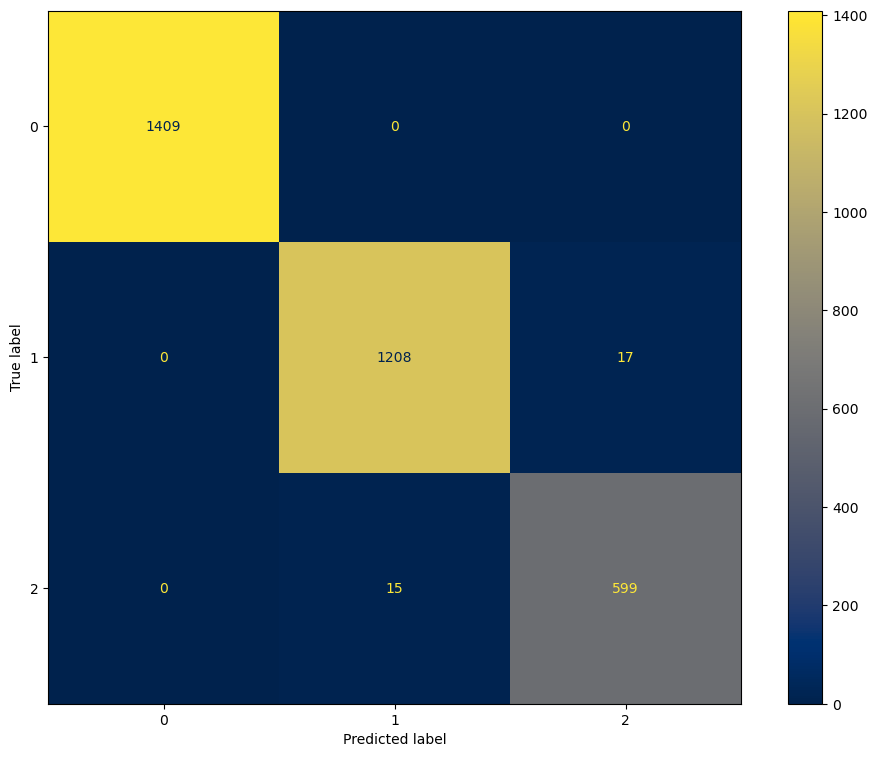

In [48]:
fig, ax = plt.subplots(figsize=(12, 9))
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test,cmap='cividis',ax=ax)

[Text(0, 0, '7067'), Text(0, 0, '6235'), Text(0, 0, '2937')]

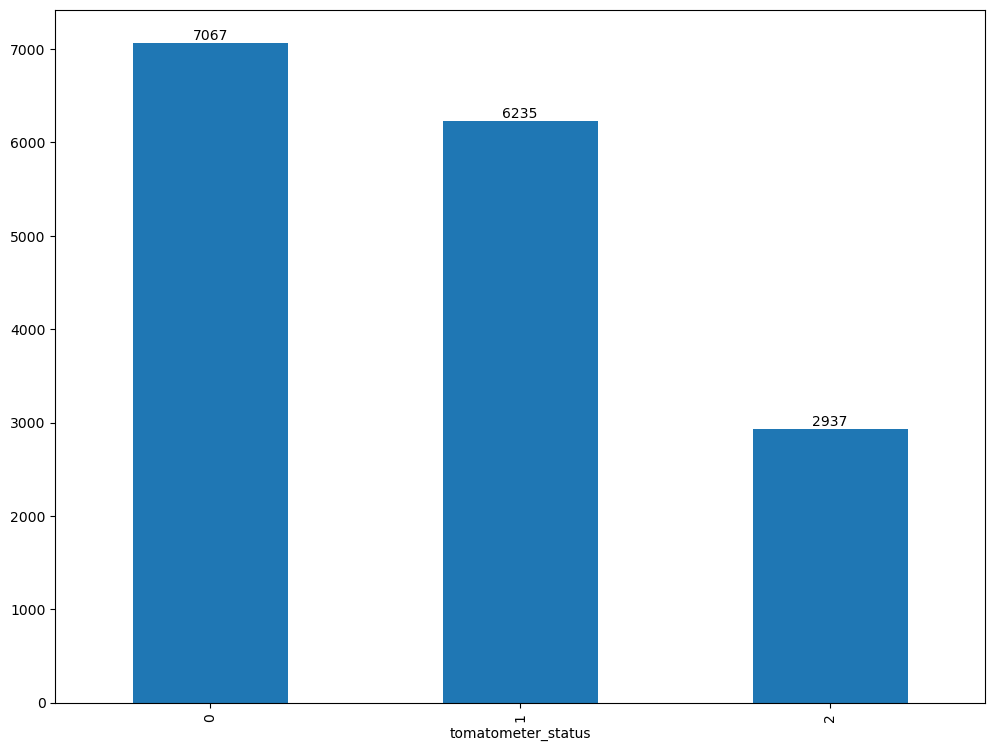

In [49]:
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [51]:
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature.tomatometer_status), y = df_feature.tomatometer_status.values)

In [54]:
class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7659544361115042, 1: 0.8681635926222935, 2: 1.843037112700034}

0.9907635467980296
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1409
           1       0.99      0.99      0.99      1225
           2       0.98      0.98      0.98       614

    accuracy                           0.99      3248
   macro avg       0.99      0.99      0.99      3248
weighted avg       0.99      0.99      0.99      3248



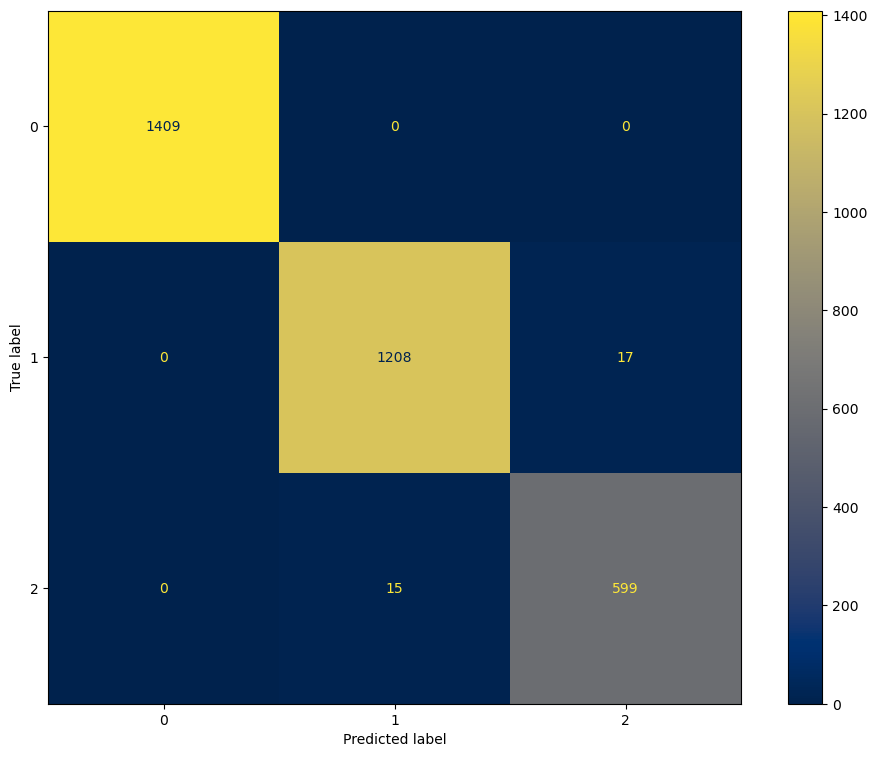

In [56]:
# Initialize Random Forest model with weight information
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

# Train the model on the training data
rf_weighted.fit(X_train, y_train)

# Predict the test data with the trained model
y_predict = rf_weighted.predict(X_test)

#Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test,cmap='cividis',ax=ax)

Our model is performing at a better pace since including class weights improves its results to 99.2% accuracy.
The counts of correct prediction for label "Fresh "has also augmented by one.
An important feature of using class weights so that it balances the proportion of data; it provokes our model to observe labels with larger weights thoroughly during the training session.